# TODO LIST
1. One genre per song
2. split train and test
3. 

# Import packages and config

In [ ]:
!pip install pandas-profiling==2.7.1

  Using cached pandas_profiling-2.7.1-py2.py3-none-any.whl (252 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached matplotlib-3.4.3-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached visions-0.4.1-py3-none-any.whl (58 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached confuse-1.6.0-py2.py3-none-any.whl (23 kB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached astropy-4.3.1-cp39-cp39-win_amd64.whl (6.4 MB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Using cached Pillow-8.3.2-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached pyerfa-2.0.0-cp39-cp39-win_amd64.whl (366 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl

You should consider upgrading via the 'C:\Users\leidy\Downloads\Asesoftware\ambiente\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached PyWavelets-1.1.1-cp39-cp39-win_amd64.whl (4.2 MB)


In [ ]:
## General packages
import pandas as pd
import numpy as np
import os
import math
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

## Neural networks packages
from keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from collections import Counter
## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge') 
#os.chdir('/content/drive/MyDrive/ML Challenge') #Thomas
os.listdir("./")

Mounted at /content/drive


['data', 'results', 'Spotify challenge.ipynb', 'Examples']

In [ ]:
DATA_PATH = './'
RESULTS_PATH = './results/'

In [ ]:
os.listdir(DATA_PATH)

['songs_genres.csv', 'final_data.csv']

# Data preprocessing

In [ ]:
songs_genres = pd.read_csv(DATA_PATH+"songs_genres.csv")
df = pd.read_csv(DATA_PATH+"final_data.csv", index_col = False)

songs_genres.genre_id.unique()
songs_genres.drop_duplicates(inplace=True)
songs_genres = shuffle(songs_genres)

print(songs_genres.value_counts().sum())
songs_genres.drop_duplicates(subset=['track_id'],keep='first',inplace=True)
## TODO plot the distribution
print(songs_genres.genre_id.value_counts())
print(songs_genres.value_counts().sum())

df = df[['artist', 'artist_id', 'track_id', 'track_name', 'duration_ms', 'key','time_signature','mode_Major','mode_Minor', 'acousticness', 'instrumentalness', 'liveness',
       'loudness', 'tempo', 'speechiness', 'valence', 'modulation','singability', 'chillness', 'danceability', 'energy', 'popularity']]
df = df.merge(songs_genres, on='track_id').drop(['modulation','chillness'],axis=1)

227294
7.0     9675
25.0    9017
10.0    8758
3.0     8723
21.0    8717
6.0     8604
26.0    8432
23.0    8426
14.0    8231
20.0    8225
16.0    8095
4.0     8005
15.0    7642
8.0     7435
24.0    6336
11.0    6300
9.0     5052
18.0    4984
12.0    4816
13.0    4807
22.0    4595
2.0     4289
17.0    4279
19.0    4148
5.0     3656
1.0      119
Name: genre_id, dtype: int64
171366


In [ ]:
feature_correlation = df.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
artist_id,1.000000,-0.008049,0.007832,0.002759,-0.077418,-0.011900,-0.028523,0.064371,0.030681,-0.043545,0.050191,-0.027812,0.027823,0.059230,0.039833,-0.002229
duration_ms,-0.008049,1.000000,-0.007466,-0.002240,0.024407,0.069009,0.016501,-0.048721,-0.027412,-0.013198,-0.129746,0.106397,-0.106401,-0.045724,-0.022998,-0.035983
mode_Major,0.007832,-0.007466,1.000000,-0.424276,0.002169,-0.052173,-0.002130,0.009244,0.012571,-0.022972,-0.002589,0.021019,-0.021025,-0.010488,0.050389,-0.021056
mode_Minor,0.002759,-0.002240,-0.424276,1.000000,-0.055745,0.025352,-0.025762,0.032454,-0.001078,0.010175,0.009101,-0.062918,0.062931,0.036754,0.089900,0.016807
acousticness,-0.077418,0.024407,0.002169,-0.055745,1.000000,0.309651,0.086098,-0.696575,-0.267401,0.176694,-0.370210,0.401265,-0.401266,-0.729403,-0.356298,-0.044048
instrumentalness,-0.011900,0.069009,-0.052173,0.025352,0.309651,1.000000,-0.164502,-0.506710,-0.110900,-0.193683,-0.338012,0.377970,-0.377974,-0.401677,-0.165201,0.044574
liveness,-0.028523,0.016501,-0.002130,-0.025762,0.086098,-0.164502,1.000000,0.055456,-0.061028,0.562108,0.014048,0.018190,-0.018185,0.207966,-0.190780,-0.134055
loudness,0.064371,-0.048721,0.009244,0.032454,-0.696575,-0.506710,0.055456,1.000000,0.250003,0.002809,0.439979,-0.475886,0.475889,0.825249,0.328561,-0.024823
tempo,0.030681,-0.027412,0.012571,-0.001078,-0.267401,-0.110900,-0.061028,0.250003,1.000000,-0.102992,0.156593,-0.047647,0.047657,0.247242,0.096841,-0.006345
speechiness,-0.043545,-0.013198,-0.022972,0.010175,0.176694,-0.193683,0.562108,0.002809,-0.102992,1.000000,0.023131,-0.136282,0.136279,0.167052,-0.177383,-0.186984


In [ ]:
df[df['instrumentalness']>1]

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,...,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
94763,The Arrogant Sons Of Bitches,12396.0,6luidVWKHWkZDmChOiKCXh,Melon Country,155200,E,4/4,1,0,0.123,...,0.346,-1.721,100.215,0.209,0.69,0.547,0.453,0.987,14.0,23.0


In [ ]:
## Normalizar: [0,1] x/max(x), Estandarizar media=0 y varianza=1, formula = (x-mean)/std
## Remove negatives, normalize/estandarizar
## Negatives: loudness, chillness, popularity
##MAX(normalize) : duration_ms, artist_id, instrumentalness, loudness, tempo, popularity
df=df[df['instrumentalness']<1]

In [ ]:
# SCALE THE DATA
df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']] = MinMaxScaler().fit_transform(df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']])
df.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,14.159367
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,7.377005
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,1.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,7.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,14.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,21.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,26.000000


In [ ]:
df2 = pd.get_dummies(df.drop(['genre_id','artist','track_id','track_name'],axis=1))
df2.head(3)

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,1.0,0.038205,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,...,0,0,0,0,0,0,0,0,1,0
1,9.0,0.053122,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,...,0,0,0,0,0,0,0,0,1,0
2,9.0,0.040700,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2.to_csv(DATA_PATH+"standirezed_data.csv",index=False)

In [ ]:
df2.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,...,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,...,0.075873,0.087480,0.065527,0.114615,0.063870,0.000035,0.013299,0.116803,0.844507,0.025355
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,...,0.264796,0.282538,0.247454,0.318558,0.244521,0.005917,0.114553,0.321187,0.362375,0.157202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df2.drop('artist_id',axis=1)
y = df['genre_id']
df3 = df2.copy()
df3['genre_id'] = df['genre_id']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [ ]:
### Train test split FOR CATEGORICAL ALGORITHMS: 20% test
X = df.drop('genre_id')
y = df['genre_id']

XC_train, XC_test, yc_train, yc_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)

KeyError: "['genre_id'] not found in axis"

# Logisitc regression

#### Results (performance)

# SVM

#### Results (performance)

# Decision Tree



In [ ]:
dot_data = tree.export_graphviz(alg1, out_file=None, 
                      feature_names=list(X_train1.columns),  
                      class_names=['0','1','2'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Results performance

# Neuronal network

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(25,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes= True)

In [ ]:
#5 iteraciones, lotes de 128 unidades
model.fit(x_train, y_train, epochs=5, batch_size=128)

In [ ]:
model.evaluate(x_test, y_test)

#### Results performance


In [ ]:
df4.shape

(171365, 32)

In [ ]:
df['genre_id'].shape

(171365,)

# K-means 
Agrupar canciones solo por sus caracteristicas

In [ ]:
df4 = pd.read_csv("./data_standarScaler.csv")
y=df['genre_id']
#df4 = df['genre_id']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df4, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


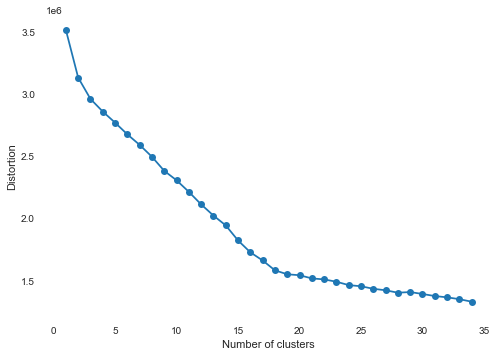

In [ ]:
#Elbow method
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 35):
    print(i)
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1234
    )
    km.fit(X_train)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
distortions[18], distortions

(1549264.4442653602,
 [3509838.078460755,
  3127266.0533784954,
  2956070.2074267063,
  2854869.970538532,
  2766027.8384575723,
  2671827.7602983043,
  2587296.288441329,
  2492108.484106376,
  2378961.623622401,
  2303660.867661571,
  2210626.6714009335,
  2110034.7245089794,
  2020536.9422385136,
  1941559.1701967376,
  1820982.8182942527,
  1725584.0323247982,
  1660252.1121677686,
  1581104.6454430667,
  1549264.4442653602,
  1541820.041272882,
  1516211.5680630184,
  1508260.9505364415,
  1489429.8308304455,
  1462537.4508392208,
  1453190.5202445888,
  1432979.900844344,
  1420895.4054638525,
  1401505.2038796132,
  1406700.1317850298,
  1391246.8152418886,
  1374664.0666370436,
  1364347.8893075325,
  1349516.6340781625,
  1329240.405147626])

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


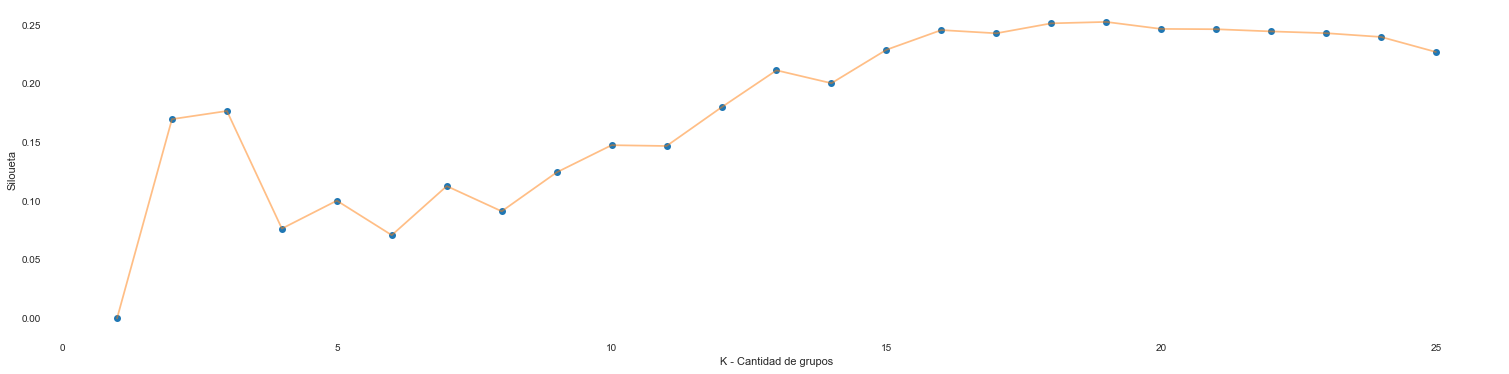

In [ ]:
silhouette = [0]
for n in range(2 , 26):
    print(n)
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, tol=1e-04,  random_state= 1234) )
    algorithm.fit(X_train)
    labels = algorithm.labels_
    centers = algorithm.cluster_centers_
    silhouette.append(silhouette_score(X_train, labels, metric = 'euclidean'))

plt.figure(1 , figsize = (26 ,6))
plt.plot(np.arange(1 , 26) , silhouette , 'o')
plt.plot(np.arange(1 , 26) , silhouette , '-' , alpha = 0.5)
plt.xlabel('K - Cantidad de grupos') , plt.ylabel('Siloueta')
plt.show()

In [ ]:
silhouette, silhouette[17]

([0,
  0.16991202682929407,
  0.17687077435077656,
  0.07659470229269072,
  0.10041905144008167,
  0.07099499652474325,
  0.11284240632561487,
  0.09135023702457143,
  0.12454057886823698,
  0.14772648354444642,
  0.1470282360234559,
  0.18002913475321272,
  0.2115658433056572,
  0.20055393817037886,
  0.22904893213889252,
  0.24586775583940104,
  0.24311944031904623,
  0.25161119837822626,
  0.25282136193905724,
  0.246855089006592,
  0.24660424675951134,
  0.24472841833356646,
  0.2432298867981056,
  0.24001812869836414,
  0.22718553938357097],
 0.25161119837822626)

In [ ]:
km = KMeans(
    n_clusters=18, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=1234
)
km.fit(X_train)
print(km.inertia_)
centroides = pd.DataFrame(km.cluster_centers_)

1581104.6454430667


In [ ]:
centroides.round(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.06,0.15,-0.12,-0.33,-0.22,-0.17,0.36,0.12,-0.14,0.24,...,-0.29,-0.31,-0.26,-0.36,3.83,-0.01,-0.12,-0.24,0.32,-0.16
1,-0.02,0.15,-0.18,-0.37,-0.23,-0.07,0.36,0.14,-0.21,0.30,...,-0.29,-0.31,-0.26,2.78,-0.26,-0.01,-0.12,-0.28,0.36,-0.16
2,-0.05,0.08,-0.05,-0.52,-0.23,-0.14,0.46,0.17,-0.06,0.22,...,-0.29,-0.31,-0.26,-0.36,-0.26,-0.01,-0.12,-0.28,0.36,-0.16
3,0.34,-0.05,-0.02,1.33,1.48,-0.33,-1.78,-0.62,-0.40,-1.18,...,-0.01,0.08,-0.12,0.09,-0.08,-0.01,-0.12,-0.36,0.43,-0.16
4,-0.04,0.19,-0.22,-0.38,-0.21,-0.08,0.36,0.17,-0.22,0.20,...,-0.29,-0.31,-0.26,-0.36,-0.26,-0.01,-0.12,-0.27,0.35,-0.16
5,-0.04,0.23,-0.23,-0.32,-0.26,-0.09,0.35,0.15,-0.24,0.26,...,-0.29,-0.31,-0.26,-0.36,-0.26,-0.01,-0.12,-0.28,0.35,-0.16
6,-0.03,-0.13,0.16,-0.24,-0.18,-0.14,0.31,0.11,-0.21,0.31,...,-0.29,3.23,-0.26,-0.36,-0.26,-0.01,-0.12,-0.26,0.34,-0.16
7,-0.04,-0.03,0.05,-0.38,-0.23,-0.10,0.36,0.17,-0.20,0.30,...,-0.29,-0.31,-0.26,-0.36,-0.26,-0.01,-0.12,-0.26,0.34,-0.16
8,0.12,-0.03,-0.11,1.12,-0.53,2.48,-0.28,-0.68,3.77,-0.16,...,0.02,0.00,0.29,-0.16,-0.02,-0.01,-0.12,1.11,-0.87,-0.16
9,-0.02,-0.22,0.28,-0.33,-0.21,-0.06,0.34,0.15,-0.22,0.19,...,3.49,-0.31,-0.26,-0.36,-0.26,-0.01,-0.12,-0.23,0.31,-0.16


In [ ]:
centroides.describe()

In [ ]:
km.labels_

array([ 7, 10,  5, ...,  9,  7,  5])

In [ ]:
km.labels_.shape

(109673,)

In [ ]:
y_train.shape

(109673,)

In [ ]:
dict_rta = {}
y_train2 = y_train.array
for i in set(km.labels_):
    a = {}
    for j in range (0,26): #generos
        c=0
        #Conteo
        for k in range(0,len(km.labels_)):
            if (km.labels_[k]==i) and (y_train2[k]==j):
                c=c+1
        a[j+1]=c
    dict_rta[i] = a
dict_rta

{0: {1: 0,
  2: 4,
  3: 201,
  4: 332,
  5: 228,
  6: 148,
  7: 77,
  8: 31,
  9: 270,
  10: 240,
  11: 332,
  12: 169,
  13: 285,
  14: 203,
  15: 359,
  16: 214,
  17: 132,
  18: 211,
  19: 274,
  20: 229,
  21: 304,
  22: 469,
  23: 171,
  24: 246,
  25: 306,
  26: 80},
 1: {1: 0,
  2: 3,
  3: 288,
  4: 467,
  5: 662,
  6: 248,
  7: 102,
  8: 76,
  9: 639,
  10: 340,
  11: 602,
  12: 422,
  13: 245,
  14: 305,
  15: 511,
  16: 397,
  17: 83,
  18: 240,
  19: 268,
  20: 222,
  21: 737,
  22: 581,
  23: 345,
  24: 794,
  25: 358,
  26: 134},
 2: {1: 0,
  2: 2,
  3: 298,
  4: 477,
  5: 256,
  6: 228,
  7: 78,
  8: 26,
  9: 328,
  10: 342,
  11: 822,
  12: 216,
  13: 590,
  14: 265,
  15: 391,
  16: 195,
  17: 56,
  18: 321,
  19: 410,
  20: 462,
  21: 469,
  22: 674,
  23: 208,
  24: 338,
  25: 354,
  26: 61},
 3: {1: 0,
  2: 15,
  3: 0,
  4: 465,
  5: 10,
  6: 1,
  7: 2509,
  8: 3,
  9: 1,
  10: 0,
  11: 36,
  12: 47,
  13: 0,
  14: 15,
  15: 215,
  16: 509,
  17: 1842,
  18: 6,
  19:

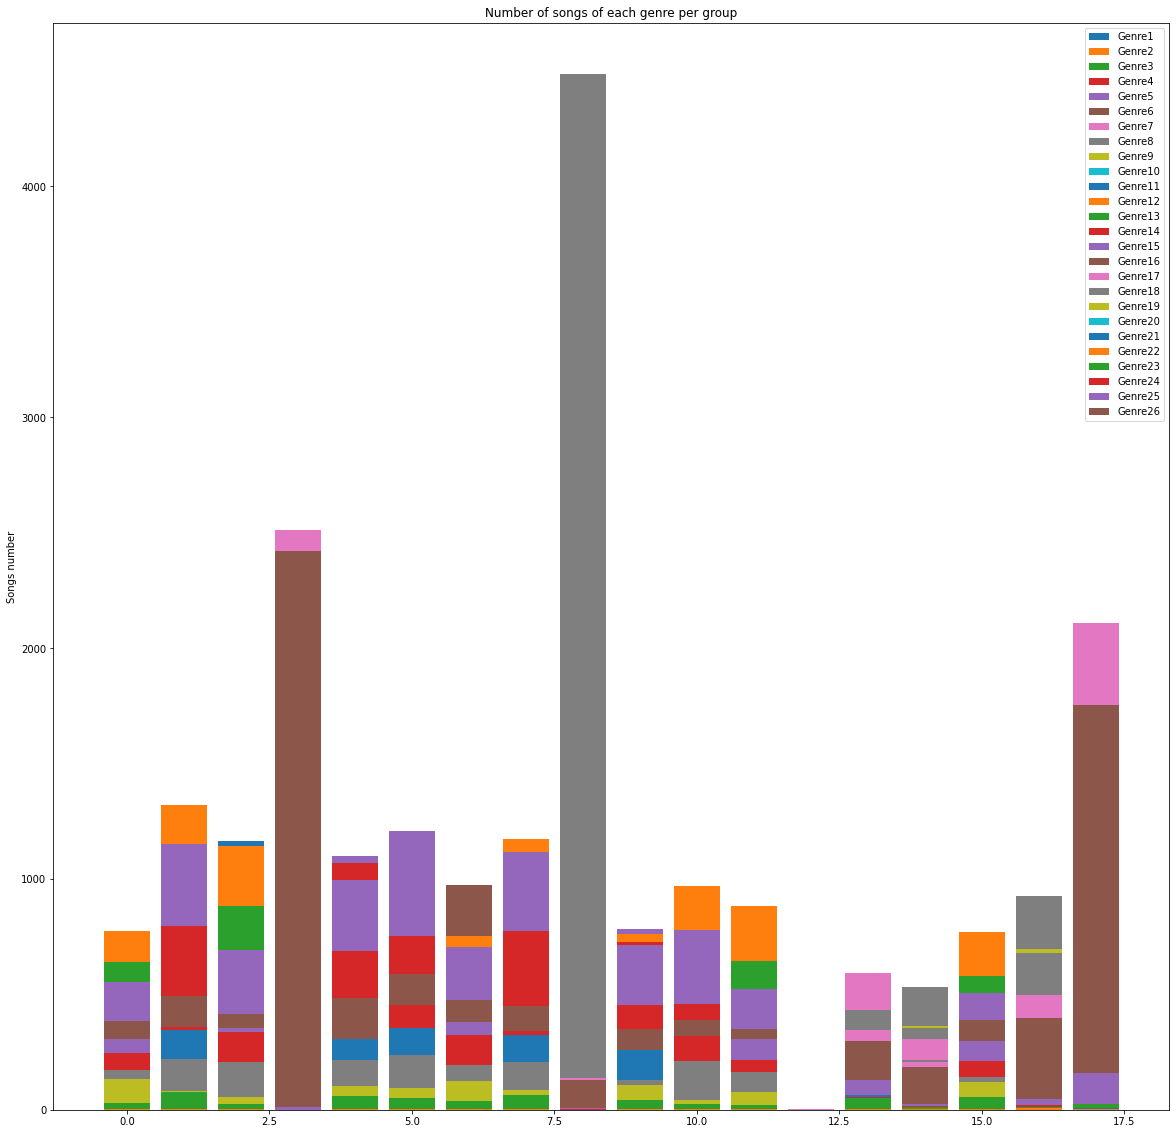

In [1]:
import matplotlib.pyplot as plt
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

genre1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genre2=[4, 3, 2, 15, 3, 3, 5, 4, 0, 4, 2, 2, 0, 3, 4, 5, 6, 11]
genre3=[201, 288, 298, 0, 271, 294, 212, 240, 0, 178, 251, 227, 0, 79, 8, 139, 23, 36]
genre4=[332, 467, 477, 465, 467, 451, 458, 431, 0, 365, 352, 364, 0, 186, 47, 287, 82, 351]
genre5=[228, 662, 256, 10, 633, 593, 421, 679, 6, 416, 326, 201, 0, 114, 43, 241, 24, 270]
genre6=[148, 248, 228, 1, 236, 237, 162, 237, 0, 182, 210, 179, 0, 68, 9, 127, 31, 37]
genre7=[77, 102, 78, 2509, 125, 90, 87, 97, 8, 108, 54, 70, 0, 337, 177, 91, 248, 1248]
genre8=[31, 76, 26, 3, 58, 51, 36, 64, 4476, 43, 26, 20, 0, 160, 356, 54, 680, 32]
genre9=[270, 639, 328, 1, 599, 507, 325, 482, 1, 452, 313, 294, 0, 164, 8, 249, 18, 108]
genre10=[240, 340, 342, 0, 254, 449, 264, 261, 0, 218, 298, 259, 0, 84, 9, 181, 25, 10]
genre11=[332, 602, 822, 36, 448, 489, 435, 483, 2, 353, 528, 423, 0, 115, 23, 410, 48, 56]
genre12=[169, 422, 216, 47, 415, 530, 272, 432, 0, 357, 280, 201, 0, 145, 38, 165, 51, 292]
genre13=[285, 245, 590, 0, 236, 265, 215, 231, 4, 186, 254, 181, 0, 49, 16, 249, 73, 3]
genre14=[203, 305, 265, 15, 301, 334, 239, 283, 0, 254, 252, 216, 0, 98, 13, 150, 36, 113]
genre15=[359, 511, 391, 215, 356, 495, 596, 349, 4, 296, 299, 247, 0, 209, 42, 446, 81, 372]
genre16=[214, 397, 195, 509, 371, 446, 376, 274, 131, 193, 162, 157, 0, 245, 101, 273, 201, 646]
genre17=[132, 83, 56, 1842, 102, 94, 124, 84, 5, 107, 43, 78, 2, 346, 206, 120, 297, 1460]
genre18=[211, 240, 321, 6, 255, 307, 242, 212, 1, 184, 217, 192, 0, 88, 9, 195, 32, 26]
genre19=[274, 268, 410, 0, 217, 302, 313, 225, 1, 193, 276, 251, 0, 93, 16, 237, 66, 48]
genre20=[229, 222, 462, 0, 215, 237, 206, 206, 2, 127, 220, 210, 1, 56, 12, 205, 43, 2]
genre21=[304, 737, 469, 0, 400, 566, 345, 617, 4, 407, 458, 404, 0, 81, 11, 333, 120, 8]
genre22=[469, 581, 674, 0, 442, 503, 409, 554, 0, 354, 511, 480, 0, 101, 9, 439, 46, 7]
genre23=[171, 345, 208, 19, 380, 356, 192, 325, 0, 273, 211, 163, 0, 82, 13, 140, 12, 51]
genre24=[246, 794, 338, 0, 689, 754, 322, 775, 5, 455, 459, 214, 0, 66, 16, 210, 22, 27]
genre25=[306, 358, 354, 10, 305, 455, 382, 340, 1, 260, 320, 308, 0, 131, 24, 297, 46, 158]
genre26=[80, 134, 61, 2410, 179, 133, 93, 111, 0, 92, 69, 40, 0, 168, 162, 94, 351, 1594]
#width = 0.35 
fig, ax = plt.subplots(figsize=(20,20))

ax.bar(labels, genre1, label='Genre1')
ax.bar(labels, genre2, label='Genre2',bottom=genre1)
ax.bar(labels, genre3, label='Genre3',bottom=genre2)
ax.bar(labels, genre4, label='Genre4',bottom=genre3)
ax.bar(labels, genre5, label='Genre5',bottom=genre4)
ax.bar(labels, genre6, label='Genre6',bottom=genre5)
ax.bar(labels, genre7, label='Genre7',bottom=genre6)
ax.bar(labels, genre8, label='Genre8',bottom=genre7)
ax.bar(labels, genre9, label='Genre9',bottom=genre8)
ax.bar(labels, genre10, label='Genre10',bottom=genre9)
ax.bar(labels, genre11, label='Genre11',bottom=genre10)
ax.bar(labels, genre12, label='Genre12',bottom=genre11)
ax.bar(labels, genre13, label='Genre13',bottom=genre12)
ax.bar(labels, genre14, label='Genre14',bottom=genre13)
ax.bar(labels, genre15, label='Genre15',bottom=genre14)
ax.bar(labels, genre16, label='Genre16',bottom=genre15)
ax.bar(labels, genre17, label='Genre17',bottom=genre16)
ax.bar(labels, genre18, label='Genre18',bottom=genre17)
ax.bar(labels, genre19, label='Genre19',bottom=genre18)
ax.bar(labels, genre20, label='Genre20',bottom=genre19)
ax.bar(labels, genre21, label='Genre21',bottom=genre20)
ax.bar(labels, genre22, label='Genre22',bottom=genre21)
ax.bar(labels, genre23, label='Genre23',bottom=genre22)
ax.bar(labels, genre24, label='Genre24',bottom=genre23)
ax.bar(labels, genre25, label='Genre25',bottom=genre24)
ax.bar(labels, genre26, label='Genre26',bottom=genre25)


ax.set_ylabel('Songs number')
ax.set_title('Number of songs of each genre per group')
ax.legend()

plt.show()

In [ ]:
real_results = {}
best_results = {}

for i in dict_rta.keys():
    max_v = 0 
    genre = 0
    max_v_b = 0 
    genre_b = 0
    for j in dict_rta[i]:
        if j not in best_results.values():
            if dict_rta[i][j]>max_v_b:
                genre_b = j
                max_v_b = dict_rta[i][j]
        if dict_rta[i][j]>max_v:
            genre = j
            max_v = dict_rta[i][j]
    best_results[i]=genre_b
    real_results[i]=genre
    
real_results, best_results

({0: 22,
  1: 24,
  2: 11,
  3: 7,
  4: 24,
  5: 24,
  6: 15,
  7: 24,
  8: 8,
  9: 24,
  10: 11,
  11: 22,
  12: 17,
  13: 17,
  14: 8,
  15: 15,
  16: 8,
  17: 26},
 {0: 22,
  1: 24,
  2: 11,
  3: 7,
  4: 5,
  5: 21,
  6: 15,
  7: 9,
  8: 8,
  9: 4,
  10: 25,
  11: 10,
  12: 17,
  13: 16,
  14: 26,
  15: 13,
  16: 19,
  17: 12})

In [ ]:
## Count:
for i in best_results:
    print(i, best_results[i], float(i+1))
    print(dict_rta[i][best_results[i]], y_train.value_counts()[float(best_results[i])])
    print(dict_rta[i][best_results[i]]/y_train.value_counts()[float(best_results[i])])
    print('-'*50)

0 22 1.0
469 2941
0.15946956817409044
--------------------------------------------------
1 24 2.0
794 4055
0.19580764488286068
--------------------------------------------------
2 11 3.0
822 4032
0.20386904761904762
--------------------------------------------------
3 7 4.0
2509 6192
0.40520025839793283
--------------------------------------------------
4 5 5.0
633 2340
0.2705128205128205
--------------------------------------------------
5 21 6.0
566 5579
0.10145187309553684
--------------------------------------------------
6 15 7.0
596 4891
0.12185647106931098
--------------------------------------------------
7 9 8.0
482 3234
0.14904143475572046
--------------------------------------------------
8 8 9.0
4476 4758
0.9407313997477932
--------------------------------------------------
9 4 10.0
365 5123
0.07124731602576616
--------------------------------------------------
10 25 11.0
320 5771
0.05544966210362156
--------------------------------------------------
11 10 12.0
259 5605
0.0

In [ ]:
y_train.value_counts()

7.0     6192
25.0    5771
10.0    5605
3.0     5582
21.0    5579
6.0     5506
26.0    5396
23.0    5392
14.0    5268
20.0    5264
16.0    5181
4.0     5123
15.0    4891
8.0     4758
24.0    4055
11.0    4032
9.0     3234
18.0    3190
12.0    3082
13.0    3077
22.0    2941
2.0     2745
17.0    2738
19.0    2655
5.0     2340
1.0       76
Name: genre_id, dtype: int64

estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ]
pipe = Pipeline(estimators)
X_mod = pipe.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()
model.fit(X,Y)
pred1 = model.predict(X)
display(pred1)
plot_confusion_matrix(model,X,Y,display_labels=le.classes_,values_format='d')
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred1,target_names=le.classes_))
print('----------Reporte para el Modelo 2----------')
print(classification_report(Y,pred2,target_names=le.classes_))
param_grid = dict(imputer__num__strategy=['mean', 'median'],
                  imputer__cat__strategy=['most_frequent', 'constant'],
                  encoder=[OrdinalEncoder(), OneHotEncoder()],
                  normalize=['passthrough', MaxAbsScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(X,Y.ravel())
print(grid_search.best_params_)

dump(grid_search.best_estimator_, 'my_model.joblib') 

model = load('my_model.joblib') 

pred1 = model.predict(X)
print('----------Reporte para el Mejor Modelo----------')
print(classification_report(Y,pred1,target_names=le.classes_))

#### Results performance

In [ ]:
X_train_2 = X_train.copy()
X_train_2['grupo'] = km.labels_
X_train_2['genre_id'] = y_train.values
# Distancias de cada observacion a cada grupo
distancias = pd.DataFrame(km.transform(X_train))
distancias.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5.940,5.364,5.419,7.328,5.439,5.333,5.706,2.908,7.609,5.899,5.868,5.967,169.156,7.548,10.944,6.015,9.057,7.762
1,6.725,6.156,6.262,7.696,6.234,6.207,6.277,6.165,7.384,6.340,3.341,6.547,169.186,7.969,11.083,6.543,9.231,8.109
2,5.627,4.980,5.178,5.461,5.038,2.258,5.239,5.081,7.121,5.376,5.448,5.603,169.077,6.838,10.189,5.556,8.158,6.222
3,6.294,5.778,3.164,7.674,5.910,5.808,5.859,5.803,7.640,6.005,5.925,6.109,169.157,7.805,11.097,6.073,9.232,8.100
4,6.220,3.448,5.724,7.125,5.755,5.652,5.733,5.648,6.778,5.838,5.812,6.028,169.161,7.577,10.758,5.972,8.843,7.617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109668,6.034,5.434,5.619,6.212,5.453,5.391,5.771,5.604,7.509,2.536,5.996,6.091,169.121,7.244,10.553,6.118,8.623,6.868
109669,2.533,5.785,5.815,7.345,5.847,5.761,6.013,5.884,8.131,6.141,6.119,6.253,169.130,7.752,11.064,6.283,9.169,7.792
109670,6.624,6.080,6.143,7.556,6.136,6.094,6.214,6.065,7.775,3.224,6.219,6.442,169.171,7.956,11.086,6.467,9.193,7.945
109671,6.387,5.828,5.879,7.740,5.993,5.870,5.925,3.446,7.400,6.085,5.999,6.204,169.181,7.876,11.121,6.129,9.269,8.165


In [ ]:
X_train_2.columns

Index(['duration_ms', 'mode_Major', 'mode_Minor', 'acousticness',
       'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness',
       'valence', 'singability', 'danceability', 'energy', 'popularity',
       'genre_id', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'time_signature_0/4', 'time_signature_1/4', 'time_signature_3/4',
       'time_signature_4/4', 'time_signature_5/4', 'grupo'],
      dtype='object')

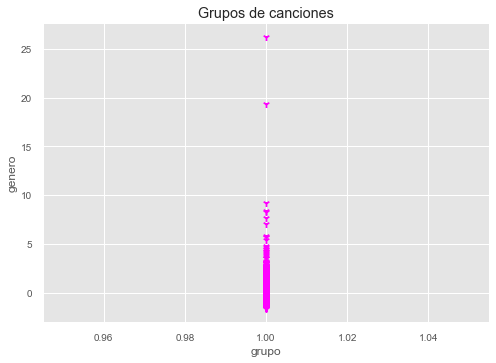

In [ ]:
import random
l_colors = ['red','blue','green','cyan','magenta','black','yellow']
l_forms = ["o","^","1","s","p","*","H"]
#for i in range(0,18):
plt.scatter(X_train_2.loc[km.labels_ == 1, ['grupo']], X_train_2.loc[km.labels_ == 1, ['duration_ms']], c=random.choice(l_colors), marker=random.choice(l_forms), picker=True)

plt.title('Grupos de canciones')
plt.xlabel('')
plt.ylabel('')
plt.show()

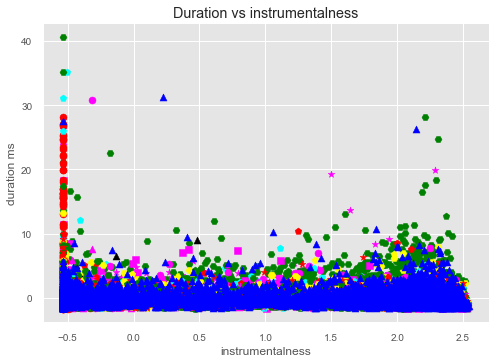

In [ ]:
for i in range(0,18):
    plt.scatter(X_train_2.loc[km.labels_ == i, ['instrumentalness']], X_train_2.loc[km.labels_ == i, ['duration_ms']], c=random.choice(l_colors), marker=random.choice(l_forms), picker=True)

for j in range(1,27):
    plt.scatter(X_train_2.loc[X_train_2['genre_id'] == i, ['instrumentalness']], X_train_2.loc[X_train_2['genre_id'] == i, ['duration_ms']], c=random.choice(l_colors), marker=random.choice(l_forms), picker=True)

plt.title('Duration vs instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('duration ms')
plt.show()

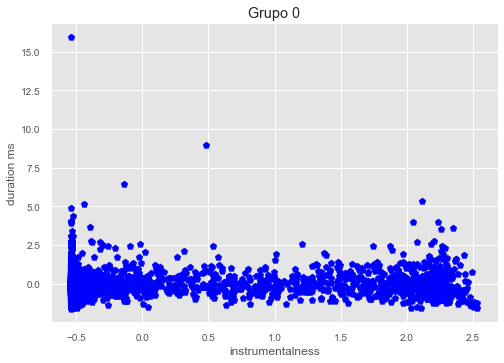

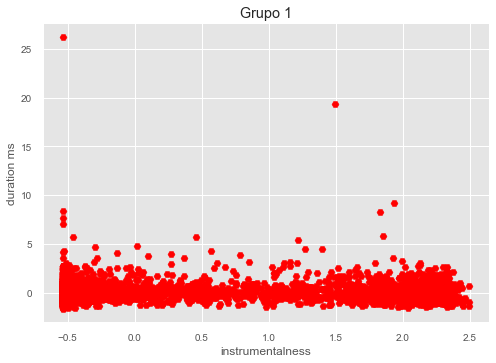

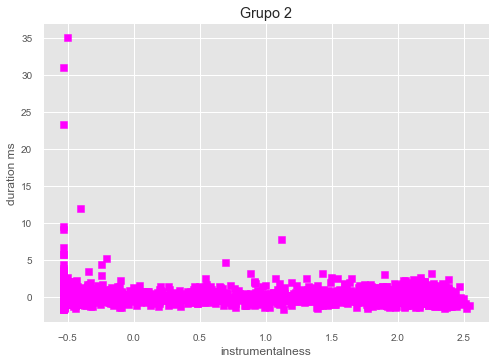

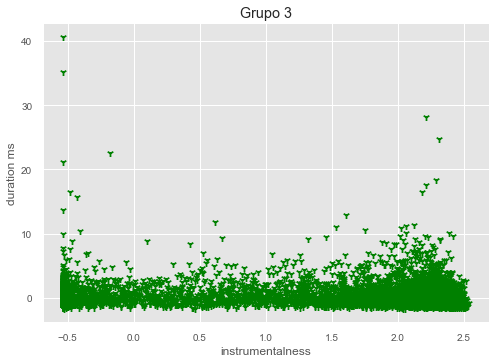

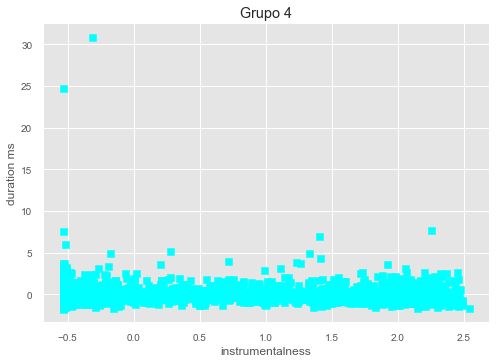

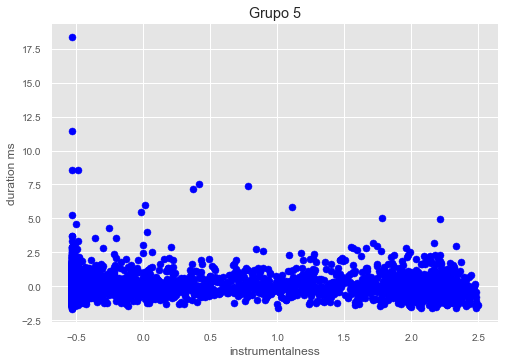

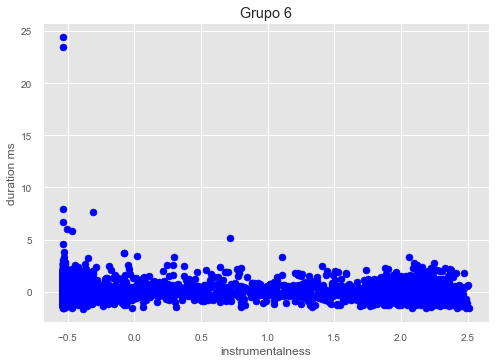

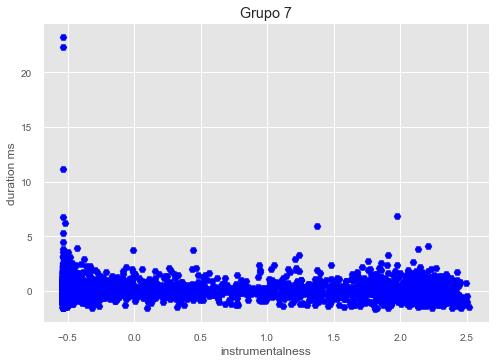

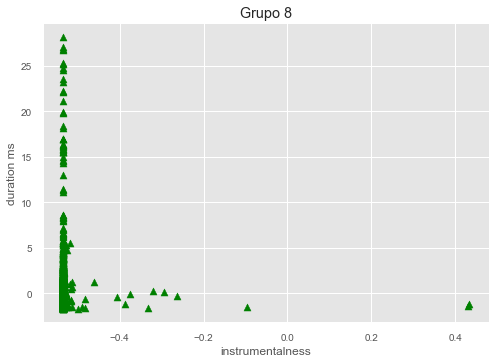

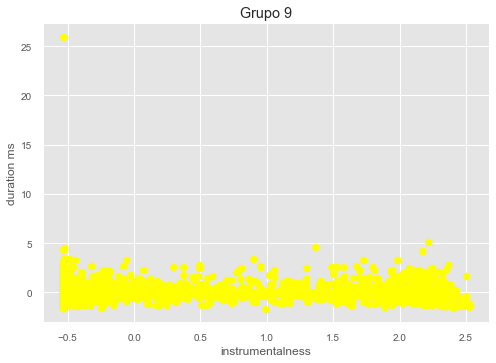

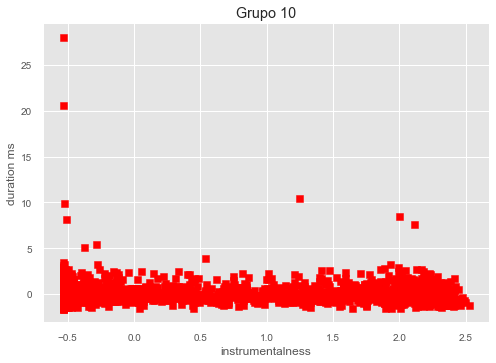

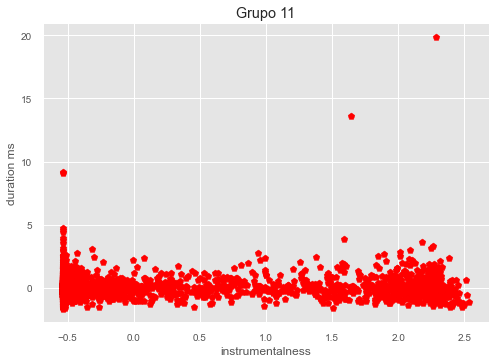

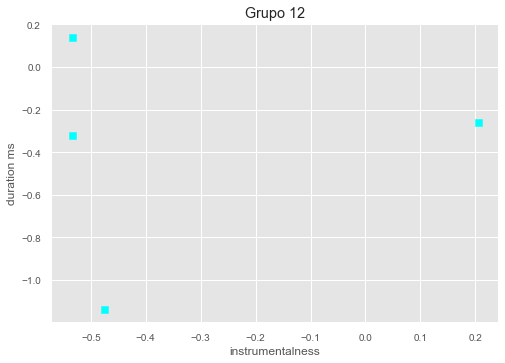

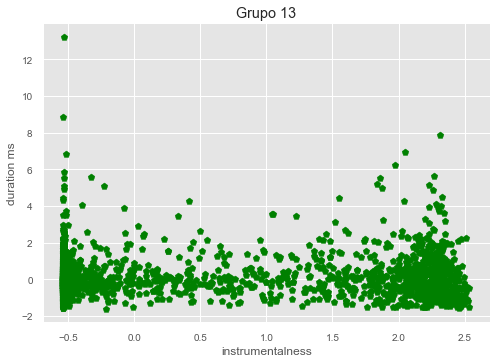

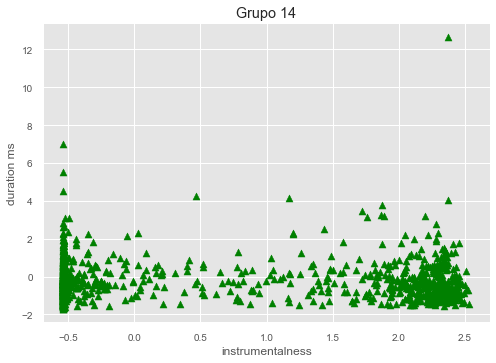

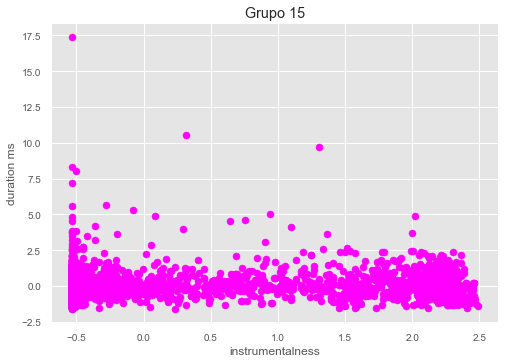

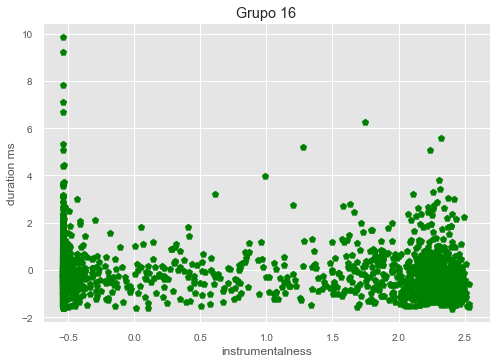

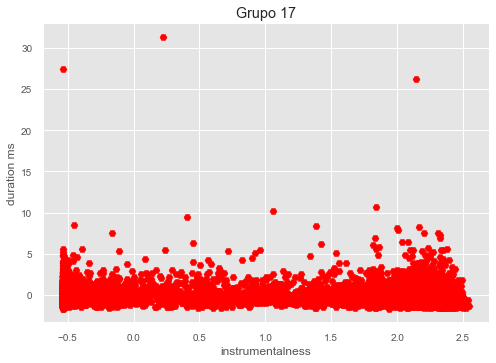

In [ ]:
for i in range(0,18):
    plt.scatter(X_train_2.loc[km.labels_ == i, ['instrumentalness']], X_train_2.loc[km.labels_ == i, ['duration_ms']], c=random.choice(l_colors), marker=random.choice(l_forms), picker=True)
    plt.title('Grupo '+str(i))
    plt.xlabel('instrumentalness')
    plt.ylabel('duration ms')
    plt.show()

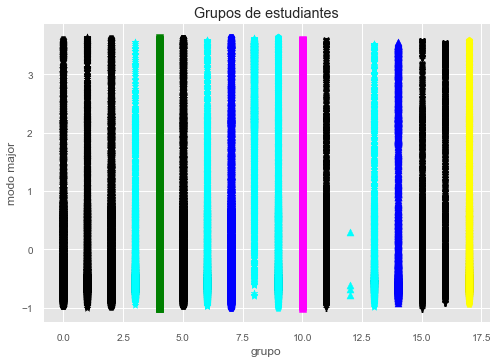

In [ ]:
for i in range(0,18):
    plt.scatter(X_train_2.loc[km.labels_ == i, ['grupo']], X_train_2.loc[km.labels_ == i, ['liveness']], c=random.choice(l_colors), marker=random.choice(l_forms), picker=True)

plt.title('Grupos de estudiantes')
plt.xlabel('grupo')
plt.ylabel('modo major')
plt.show()

In [ ]:
X_train_2.columns

Index(['duration_ms', 'mode_Major', 'mode_Minor', 'acousticness',
       'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness',
       'valence', 'singability', 'danceability', 'energy', 'popularity',
       'genre_id', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'time_signature_0/4', 'time_signature_1/4', 'time_signature_3/4',
       'time_signature_4/4', 'time_signature_5/4', 'grupo'],
      dtype='object')

In [ ]:
X_train

,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
37358,-0.531294,1.228879,-0.521382,-0.943358,-0.534719,-0.794269,0.739714,-0.858566,-0.353873,0.148645,...,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
80969,0.214358,-0.813750,1.917981,-1.084399,-0.519549,0.430657,1.126730,1.203618,-0.206902,0.717179,...,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
77223,-0.512423,-0.813750,-0.521382,-0.292758,-0.533680,-0.425145,0.073848,0.924130,-0.209335,-0.608146,...,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
20441,-0.212916,-0.813750,1.917981,-1.076864,-0.268246,-0.721855,0.335521,0.252012,-0.266274,-0.050907,...,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
113947,-0.140530,-0.813750,1.917981,-0.494791,-0.534728,2.085835,0.578161,-0.575201,-0.467752,0.992033,...,-0.286535,-0.309623,-0.264805,2.779363,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136509,0.177045,1.228879,-0.521382,-0.873193,-0.534692,-0.600538,0.525702,0.741735,-0.447312,-0.578025,...,3.489971,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
68196,-0.224745,-0.813750,-0.521382,-1.076618,-0.534728,-0.663077,0.822812,-0.001892,-0.454612,-0.706039,...,-0.286535,-0.309623,-0.264805,-0.359795,3.828436,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
3366,-0.588487,-0.813750,1.917981,-1.083607,-0.534728,0.646958,0.890435,1.299725,-0.052144,0.175000,...,3.489971,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
122531,0.209465,-0.813750,1.917981,-0.393775,-0.534728,0.115609,0.714336,-0.796973,-0.175269,1.586923,...,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
